In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercício 1 - Normalização FFT

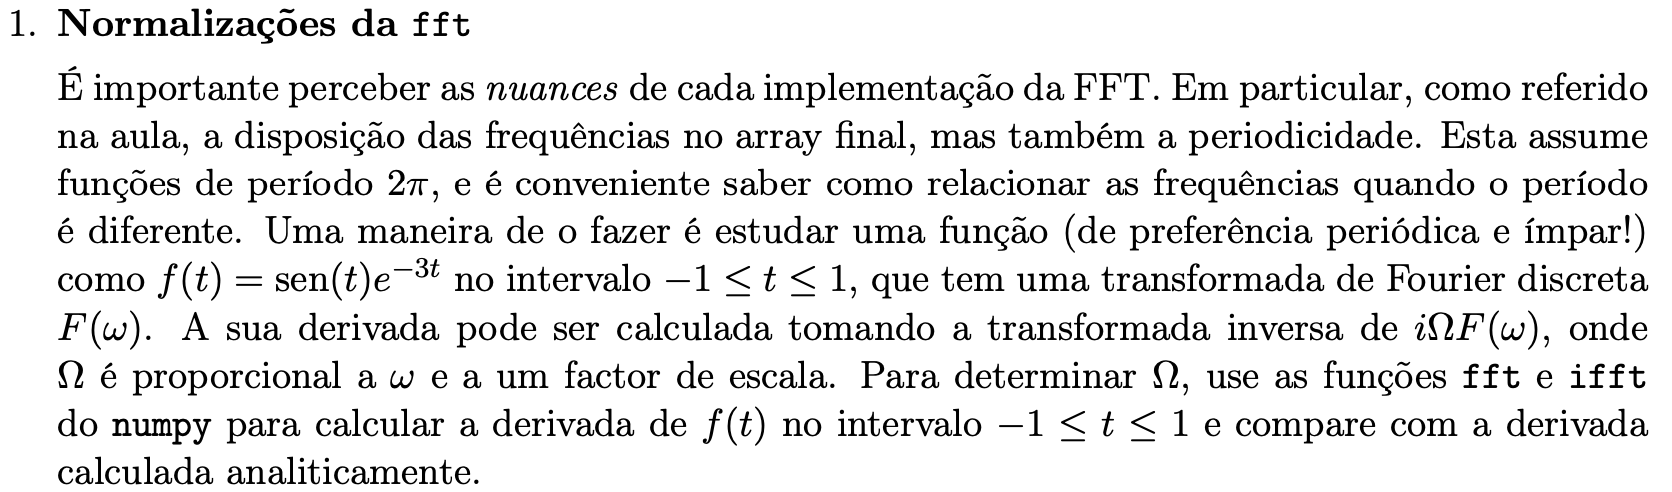

Análiticamente: $$f'(t)=\cos(t)e^{-3t}-3t sin(t)e^{-3t}$$

/Users/cauaveiga/miniforge3/envs/labs/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


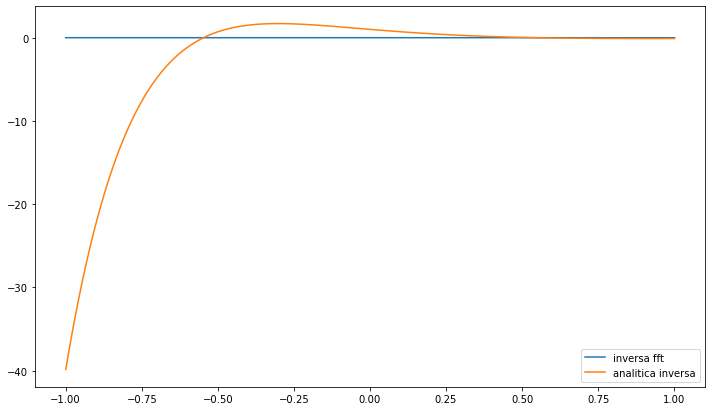

In [9]:
def f(x):
    return np.sin(x)*np.exp(-3*x)

inter = np.linspace(-1,1.001,4000)

amostra = f(inter)

fft = np.fft.fft(amostra)

rfreqs = np.array([(i*1.0/4000)*2000 for i in range(4000//2+1)]) # Reajustar eixo frequencias
rfft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft) for i in fft] # Reajustar yy

rfrq = np.fft.fftfreq(amostra.size,2000)

iffr = np.fft.ifft(1j*np.pi*2*rfrq*fft) # inversa



#analitica
def fp(x):
    return np.cos(x)*np.exp(-3*x)-3*x*np.sin(x)*np.exp(-3*x)
dd = fp(inter)


FANAL = np.fft.rfft(dd)

inFANAL = np.fft.irfft(FANAL)

plt.figure(figsize=(12,7))

#plt.plot(inter,amostra,label="amostra")
#plt.plot(inter,dd,label='anal')
plt.plot(inter,iffr,label='inversa fft')
plt.plot(inter,inFANAL,label="analitica inversa")

plt.legend()
plt.show()



In [132]:
np.amax(inFANAL)

1.6956397072853826

/Users/cauaveiga/miniforge3/envs/labs/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'fourier derivada analitica')

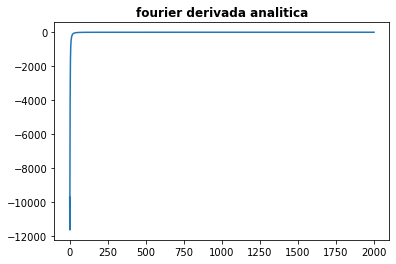

In [127]:
plt.plot(FANAL)
plt.title("fourier derivada analitica",fontweight="bold")

/Users/cauaveiga/miniforge3/envs/labs/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'fourier numerica')

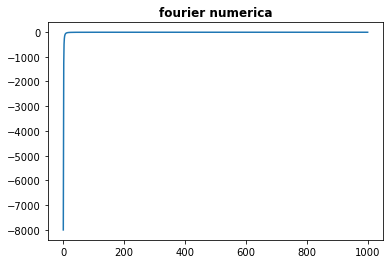

In [128]:
rfreqs = [(i*1.0/4000)*2000 for i in range(4000//2+1)]
rfft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft) for i in fft]
plt.plot(rfreqs,fft)
plt.title("fourier numerica",fontweight="bold")

# Exercício 2

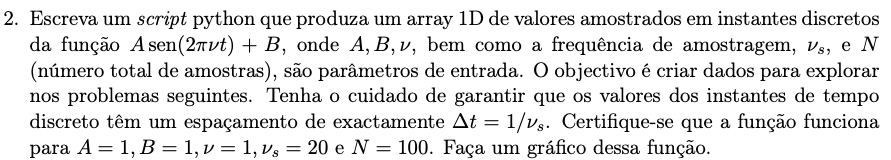

In [91]:
def dataloader(a,b,v,vs,N):
    """"Output: tempo(s) (xx), grandeza (yy) """
    # espaçamento
    dt = 1/vs

    tt = np.arange(0,dt*N+dt, dt)
    
    return tt,a*np.sin(2*np.pi*v*tt) + b



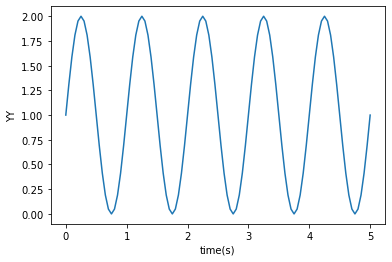

In [92]:
tt,yy = dataloader(1,1,1,20,100)
plt.plot(tt,yy)
plt.xlabel("time(s)")
plt.ylabel("YY")
plt.show()


# Exercício 3

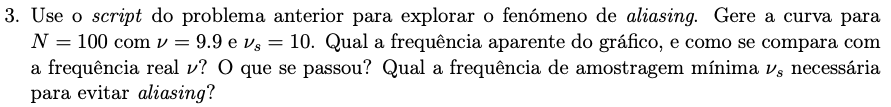

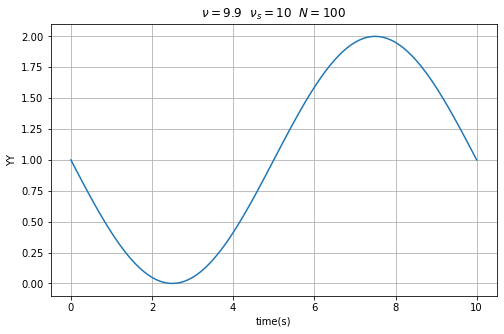

In [93]:
# Gerando a amostra enunciada
time, yax = dataloader(1,1,9.9,10,100)

plt.figure(figsize=(8,5))
plt.plot(time,yax)
plt.xlabel("time(s)")
plt.ylabel("YY")
plt.title(r"$\nu=9.9\ \ \nu_s=10\ \ N=100$")
plt.grid()

plt.show()

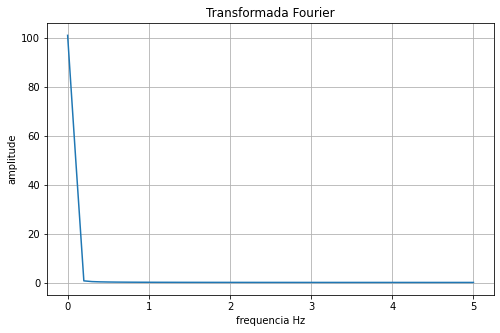

In [94]:
# Realizando transformada de fourier para determinar a frequência

rfft_output = np.fft.rfft(yax)

rfreqs = [(i*1.0/100)*10 for i in range(100//2+1)]

plt.figure(figsize=(8,5))
plt.plot(rfreqs,abs(rfft_output))
plt.title("Transformada Fourier")
plt.xlabel("frequencia Hz")
plt.ylabel("amplitude")
plt.grid()
plt.show()

Podemos notar que nossa frequencia pode ir de $[0,5]$ Hz, e pela transformada de fourier, aparentemente temos um grande pico em $0$ e nulo no restante, o que não está de acordo com a frequência esperada de $9.9Hz$. Pelo teorema de Nyquist-Shanoon, devemos garantir uma frequência de amostragem $\nu_s \geq 2\times f_c$ onde $f_c$ é a maior frequência apresentada, onde neste caso, sabemos que $f_c=\nu=9.9Hz$, ou seja, a frequência de amostragem mínima será $\nu_s=19.8Hz$

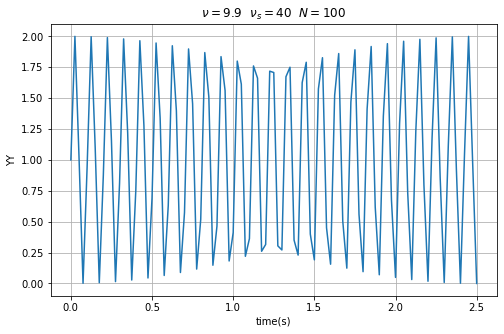

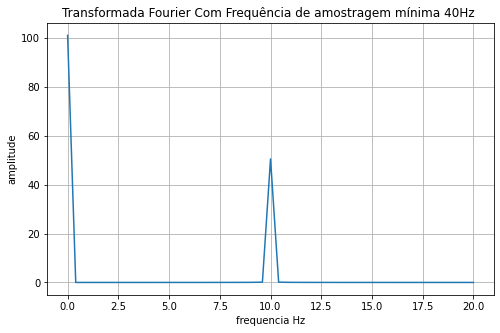

In [101]:


# Gerando a amostra enunciada
time, yax = dataloader(1,1,9.9,40,100)

plt.figure(figsize=(8,5))
plt.plot(time,yax)
plt.xlabel("time(s)")
plt.ylabel("YY")
plt.title(r"$\nu=9.9\ \ \nu_s=40\ \ N=100$")
plt.grid()

plt.show()

# Realizando transformada de fourier para determinar a frequência

rfft_output = np.fft.rfft(yax)

rfreqs = [(i*1.0/100)*40 for i in range(100//2+1)]

plt.figure(figsize=(8,5))
plt.plot(rfreqs,abs(rfft_output))
plt.title("Transformada Fourier Com Frequência de amostragem mínima 40Hz ")
plt.xlabel("frequencia Hz")
plt.ylabel("amplitude")
plt.grid()
plt.show()

Acima utilizamos $\nu_s=40Hz$ que é mais que o dobro que a frequência mínima necessária, evitando então o antialising, e como podemos ver, a frequência dada pela transformada é 9.9Hz como esperado.

# Exercício 4

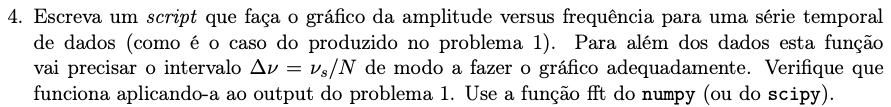

In [ ]:
def amp_freq(dados, dv, N):
    
    vs = dv*N #Frequencia de medicao
    
    fft_ = np.fft.rfft(dados)
    
    rfreqs = np.array([(i*1.0/N)*vs for i in range(N//2+1)]) # Reajustar eixo frequencias
    rfft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_) for i in fft_] # Reajustar yy
    
    
    
    